In [98]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib as mpl
from mplsoccer.pitch import Pitch
from scipy.spatial import ConvexHull
from scipy import stats

In [99]:
df = pd.read_csv(r"C:\Users\George\Documents\Football Analytics\Data\convextutorial.csv")

In [100]:
df = df.fillna(0)

In [101]:
df['y'] = df['y'] * 0.8
df['x'] = df['x'] * 1.2

In [102]:
# Select Barcelona
df =df[df['teamId'] == 65]

In [103]:
df['playerId'] = df['playerId'].astype(int)


In [104]:
players = df['playerId'].unique()

In [105]:
starters = players[1:12]

In [106]:
starters.sort()

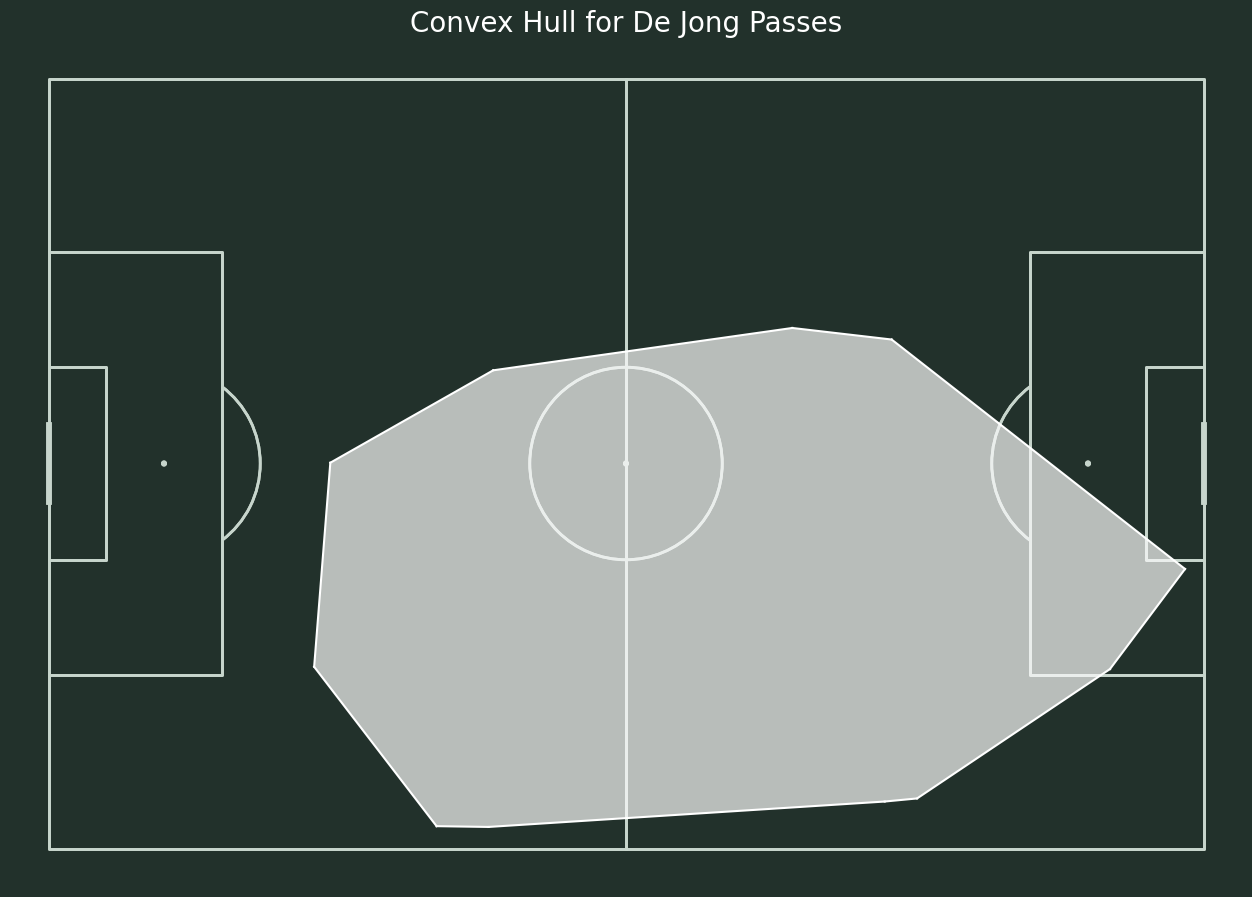

In [118]:
# a single player
pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)
fig.set_facecolor('#22312b')
ax.patch.set_facecolor('#22312b')
pitch.draw(ax=ax)
plt.gca().invert_yaxis()

df1 = df[df['playerId'] == 21]
# select passes
df1 = df1[df1['type/value'] == 1]
# get rid of outliers
# eliminate any passes 2 standard deviations away from the mean
df1 = df1[(np.abs(stats.zscore(df1[['x', 'y']])) < 3)]
df1 = df1.dropna(subset=['x', 'y'])
# array of all our x and y coordinates
points = df1[['x', 'y']].values
# create a convex hull
hull = ConvexHull(df1[['x', 'y']])
for i in hull.simplices:
    plt.plot(points[i, 0], points[i, 1], 'white')
    plt.fill(points[hull.vertices,0], points[hull.vertices,1], 'white', alpha=0.1)

plt.title('Convex Hull for De Jong Passes', color='white', size=20);

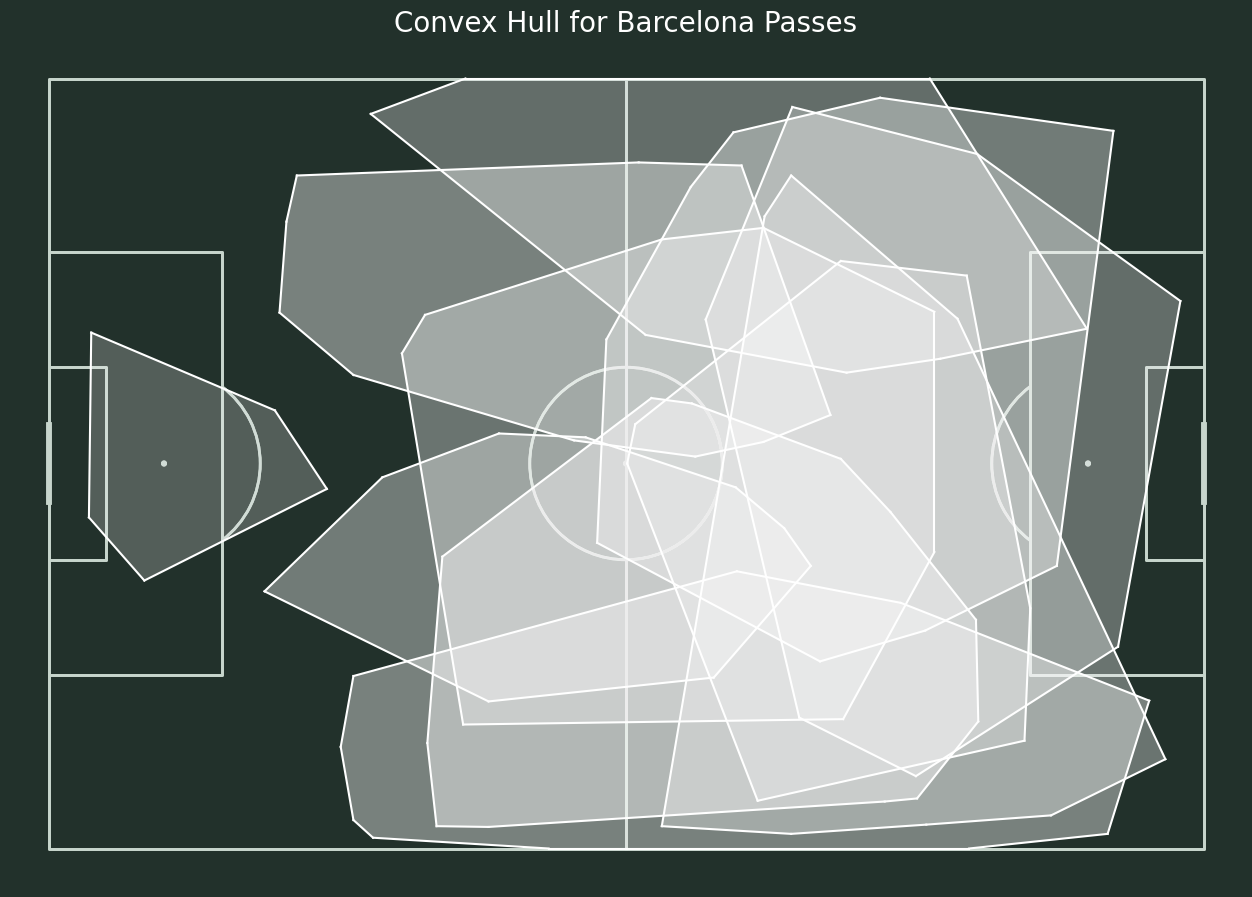

In [119]:
pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)
fig.set_facecolor('#22312b')
ax.patch.set_facecolor('#22312b')
pitch.draw(ax=ax)
plt.gca().invert_yaxis()

for player in starters:
    df2 = df[df['playerId'] == player]
    df2 = df2[df2['type/value'] == 1]
    df2 = df2[(np.abs(stats.zscore(df2[['x', 'y']])) < 2)]
    df2 = df2.dropna(subset=['x', 'y'])
    points = df2[['x', 'y']].values
    try:
        hull = ConvexHull(df2[['x', 'y']])
    except:
        pass
    try:
        for i in hull.simplices:
            plt.plot(points[i, 0], points[i, 1], 'white')
            plt.fill(points[hull.vertices,0], points[hull.vertices,1], 'white', alpha=0.05)
    except:
        pass
plt.title('Convex Hull for Barcelona Passes', color='white', size=20);